### Step 1. 필요한 라이브러리 임포트

In [1]:
import pandas as pd

### Step 2. [데이터](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv) 확인

### Step 3. 데이터 불러오기


**read_csv를 통해 데이터를 올바른 형태로 불러온 뒤 drinks 저장해주세요**  
data : drinks.csv

In [9]:
drinks = pd.read_csv('data/drinks.csv')
drinks.fillna('NA',inplace=True)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 4. 어느 대륙(continent)이 평균 맥주 소모량이 가장 높은가요?

EU

In [18]:
a=drinks.groupby('continent').mean()['beer_servings']
a

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [20]:
a[a==a.max()]

continent
EU    193.777778
Name: beer_servings, dtype: float64

### Step 5. 각 대륙(continent)별 와인 소모 통계값 계산해주세요

count, mean,std, min, max값은 'describe'를 통해 한번에 조회할 수 있습니다

groupby후 describe를 적용해보세요

In [26]:
drinks.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
NA,23.0,24.521739,28.266378,1.0,5.0,11.0,34.00,100.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. 평균 알코올 소비량을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 평균값을 구해주세요

In [13]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. 알코올 소비량 중간값을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 중간값을 구해주세요

중간값은 .median()으로 구합니다

In [14]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
NA,143.0,137.0,11.0,6.30
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. 증류주(spirit) 소비량의 평균, 최소, 최대값을 구해주세요

Hint: groupby와 agg 함수를 사용하여 한번에 표현해주세요

In [37]:
drinks.groupby('continent')['spirit_servings'].agg(['mean','min','max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
NA,165.739130,68,438
OC,58.437500,0,254
SA,114.750000,25,302


### Step 9. 대륙별 맥주 소비량의 평균을 Bar 그래프로 표현해주세요

In [42]:
a=drinks.groupby('continent')['beer_servings'].mean()
a

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

<AxesSubplot:ylabel='continent'>

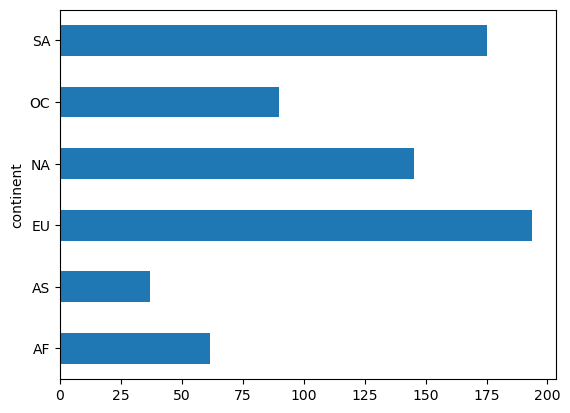

In [47]:
a.plot(kind='barh')

In [52]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

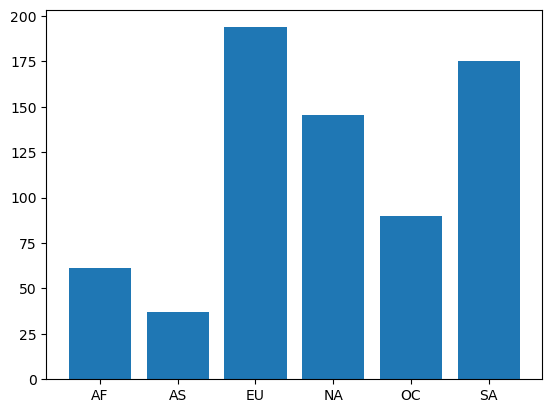

In [54]:
plt.bar(a.index,a.values)